# Worksheet 

[QUIZZ](https://forms.gle/RRf5HVH7Vw5xhwAx8)

### Kmeans ++

a) What's the main limitation of Farthest First Traversal?

This could lead to outliers being chosen as cluster centers, leading to all middle data points being clustered into one giant cluster

b) What is the difference between K means and K means ++?

Kmeans uses random initialization, while Kmeans++ uses probabilities based on distances to find centroids

c) What are some limitations of Kmeans/ Kmeans++?

They may not converge to the global optimum depending on the center initialization, or if the k isn't chosen correctly. Also, they are sensitive to outliers

d) Explain why we need silhouette scores

Silhouette scores give a measure of cluster quality

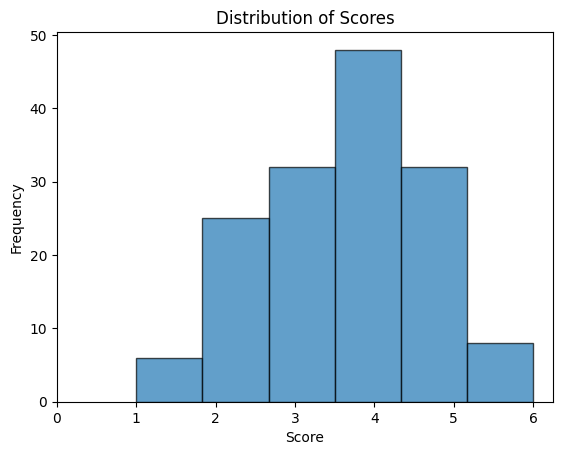

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./quizz1_scores.csv")
df[['score', 'total']] = df['Scores'].str.split('/', expand=True).astype(float)

plt.hist(df['score'], bins=6, edgecolor='black', alpha=0.7)
plt.xticks(range(7))
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores")
plt.show()

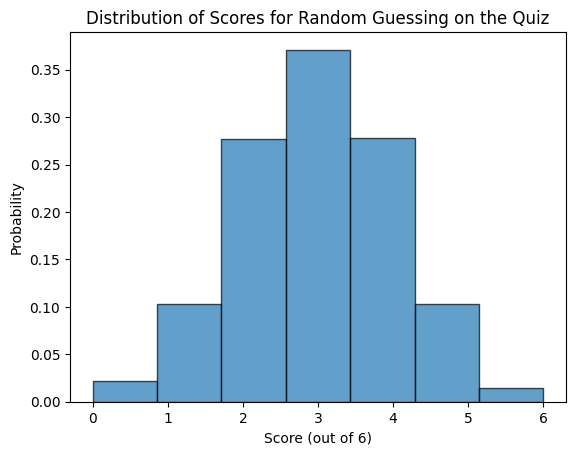

In [2]:
import numpy as np

num_questions = 6
true_answers = ['T', 'F', 'F', 'T', 'T', 'T']
num_simulations = 1000

scores = []
for _ in range(num_simulations):
    guesses = np.random.choice(['T', 'F'], size=num_questions)
    score = sum(guesses == np.array(true_answers))
    scores.append(score)

plt.hist(scores, bins=7, edgecolor='black', alpha=0.7, density=True)
plt.xticks(range(num_questions+1))
plt.xlabel("Score (out of 6)")
plt.ylabel("Probability")
plt.title("Distribution of Scores for Random Guessing on the Quiz")
plt.show()

3.6556291390728477
2.98


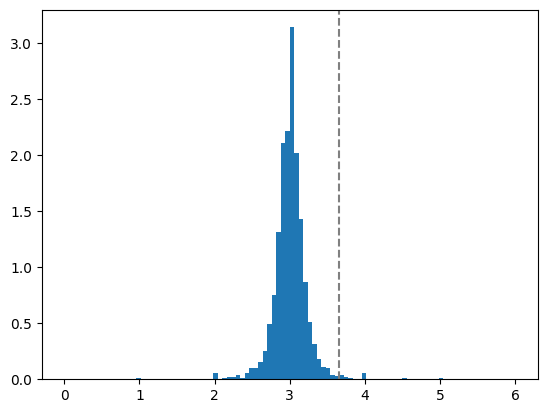

In [3]:
print(df['score'].mean())
print(np.mean(np.array(scores)))

num_questions = 6
true_answers = ['T', 'F', 'F', 'T', 'T', 'T']
num_simulations = 1000
class_size = 151

avg_scores = []
for _ in range(num_simulations):
    scores = []
    for _ in range(class_size):
        guesses = np.random.choice(['T', 'F'], size=num_questions)
        score = sum(guesses == np.array(true_answers))
        scores.append(score)
        avg_scores.append(np.mean(np.array(scores)))

plt.hist(avg_scores, bins=100, density=True)
plt.axvline(df['score'].mean(), color='grey', linestyle='dashed')
plt.show()

In [4]:
num_questions = 6
true_answers = ['T', 'F', 'F', 'T', 'T', 'T']
num_simulations = 1000
class_size = 151

num_times_random_beats_class = 0
for _ in range(num_simulations):
    scores = []
    for _ in range(class_size):
        guesses = np.random.choice(['T', 'F'], size=num_questions)
        score = sum(guesses == np.array(true_answers))
        scores.append(score)
        if np.mean(np.array(scores)) > df['score'].mean():
            num_times_random_beats_class += 1

print(f'Out of {num_simulations}, random beat the class {num_times_random_beats_class}. Or {num_times_random_beats_class / num_simulations} % of the time')

Out of 1000, random beat the class 1718. Or 1.718 % of the time
